# Influencer experiment
Using Sub-Model 2.2 with influencer mechanism added

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import cProfile
import pstats
import mesa
pd.set_option('display.max_colwidth', 10000)
import joblib
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import itertools
import matplotlib.ticker as mtick

from influencer_model import ConsumatModel  

base_config = {
    'TP_percentage': 0.5,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'epsilon': 0.5,
    'comparison_attributes': ['budget', 'preference_sustainability', 'preference_conformity'],
    'seed': 42,  
    'num_influencers': 160    
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})

# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})

network_configs = {
    'Watts-Strogatz': watts_strogatz_config,
    'Barabasi-Albert': barabasi_albert_config,
    'Random Regular': random_regular_config,
    'Holme-Kim': holme_kim_config
}


In [2]:
tp_percentages = np.arange(0, 1.05, 0.05)
num_steps = 10
all_results = {network: {} for network in network_configs}
final_adoption_rates = {network: [] for network in network_configs}

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': []
    }

    for step in tqdm(range(num_steps), desc='Simulation Progress'):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())

    model_data = pd.DataFrame(collected_data)
    return model_data

def plot_metric(data, metric, ylabel, filename, scale_as_percentage=False):
    plt.figure(figsize=(15, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

    for color, (tp, df) in zip(colors, data.items()):
        tp_percentage_label = f'{tp * 100:.1f}%'  # Convert TP to percentage for the legend
        if scale_as_percentage:
            plt.plot(df['Step'], df[metric], label=tp_percentage_label, color=color, marker='o')
        else:
            plt.plot(df['Step'], df[metric], label=tp_percentage_label, color=color, marker='o')

    plt.xlabel('Step', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title='TP Percentage', fontsize=12)
    plt.grid(True)

    if scale_as_percentage:
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    
    plt.savefig(f'influencer_{filename}.png')
    plt.close()

for network_type, config in network_configs.items():
    for tp in tp_percentages:
        config['TP_percentage'] = tp
        model = ConsumatModel(config)
        model_data = collect_simulation_data(model, num_steps)
        all_results[network_type][tp] = model_data
        final_adoption_rate = model_data['Adoption Rate'].iloc[-1]
        final_adoption_rates[network_type].append(final_adoption_rate)

metrics = [
    ('Adoption Rate', 'Adoption Rate (%)')
]

for network_type, data in all_results.items():
    for metric, ylabel in metrics:
        plot_metric(data, metric, ylabel, f'{network_type.lower().replace(" ", "_")}_{metric.lower().replace(" ", "_")}', False)

# Additional plot for final adoption rates
for network_type, rates in final_adoption_rates.items():
    plt.figure(figsize=(12, 10))
    plt.plot(tp_percentages*100, rates, marker='o')
    plt.xlabel('TP introduction percentage (%)', fontsize=14)
    plt.ylabel('Final True Price Adoption Rate (%)', fontsize=14)
    plt.ylim(0, 100)
    plt.grid(True)
    plt.savefig(f'influencer_final_true_price_adoption_rate_{network_type.lower().replace(" ", "_")}.png')
    plt.close()

Simulation Progress: 100%|██████████| 10/10 [00:26<00:00,  2.64s/it]


In [2]:
base_config = {
    'TP_percentage': 0.5,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'epsilon': 0.5,
    'comparison_attributes': ['budget', 'preference_sustainability', 'preference_conformity'],
    'seed': 42,  
    'num_influencers': 160    
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})

# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})

network_configs = {
    'Watts-Strogatz': watts_strogatz_config,
    'Barabasi-Albert': barabasi_albert_config,
    'Random Regular': random_regular_config,
    'Holme-Kim': holme_kim_config
}
influencers = np.arange(0, 340, 20)
num_steps = 10
all_results = {network: {} for network in network_configs}
final_adoption_rates = {network: [] for network in network_configs}

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': []
    }

    for step in tqdm(range(num_steps), desc='Simulation Progress'):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())

    model_data = pd.DataFrame(collected_data)
    return model_data

def plot_metric(data, metric, ylabel, filename, scale_as_percentage=False):
    plt.figure(figsize=(15, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

    for color, (tp, df) in zip(colors, data.items()):
        tp_percentage_label = f'{tp}'  # Convert TP to percentage for the legend
        if scale_as_percentage:
            plt.plot(df['Step'], df[metric], label=tp_percentage_label, color=color, marker='o')
        else:
            plt.plot(df['Step'], df[metric], label=tp_percentage_label, color=color, marker='o')

    plt.xlabel('Step', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title='Influencers', fontsize=12)
    plt.grid(True)

    if scale_as_percentage:
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    
    plt.savefig(f'influencer2_{filename}.png')
    plt.close()

for network_type, config in network_configs.items():
    for tp in influencers:
        config['num_influencers'] = tp
        model = ConsumatModel(config)
        model_data = collect_simulation_data(model, num_steps)
        all_results[network_type][tp] = model_data
        final_adoption_rate = model_data['Adoption Rate'].iloc[-1]
        final_adoption_rates[network_type].append(final_adoption_rate)

metrics = [
    ('Adoption Rate', 'Adoption Rate (%)')
]

for network_type, data in all_results.items():
    for metric, ylabel in metrics:
        plot_metric(data, metric, ylabel, f'{network_type.lower().replace(" ", "_")}_{metric.lower().replace(" ", "_")}', False)

# Additional plot for final adoption rates
for network_type, rates in final_adoption_rates.items():
    plt.figure(figsize=(12, 10))
    plt.plot(influencers, rates, marker='o')
    plt.xlabel('Influencers', fontsize=14)
    plt.ylabel('Final True Price Adoption Rate (%)', fontsize=14)
    plt.ylim(0, 100)
    plt.grid(True)
    plt.savefig(f'influencer2_final_true_price_adoption_rate_{network_type.lower().replace(" ", "_")}.png')
    plt.close()

Simulation Progress: 100%|██████████| 10/10 [00:49<00:00,  4.99s/it]


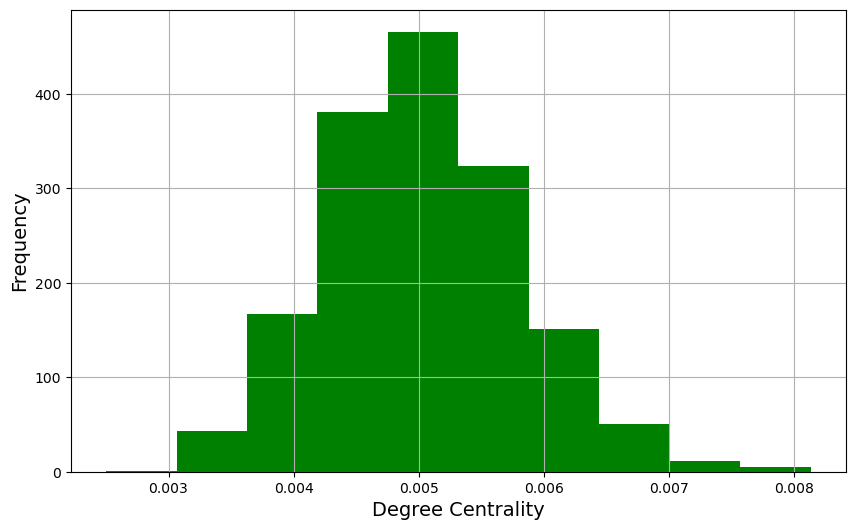

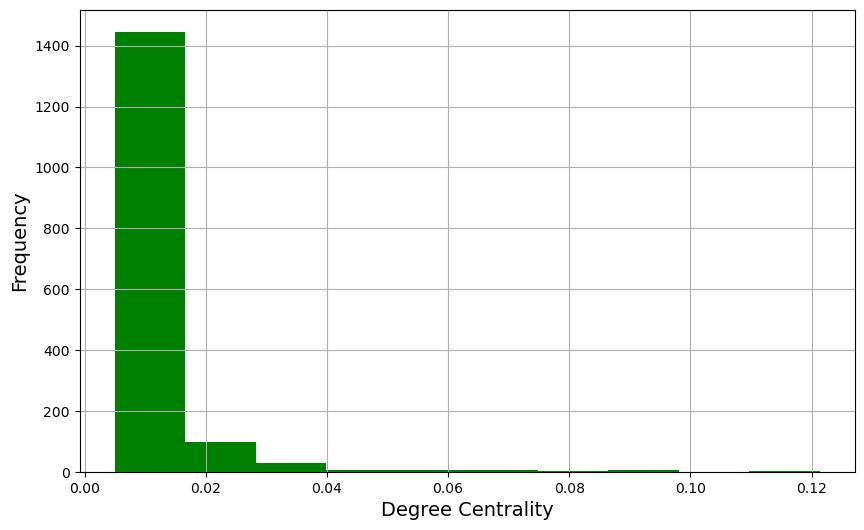

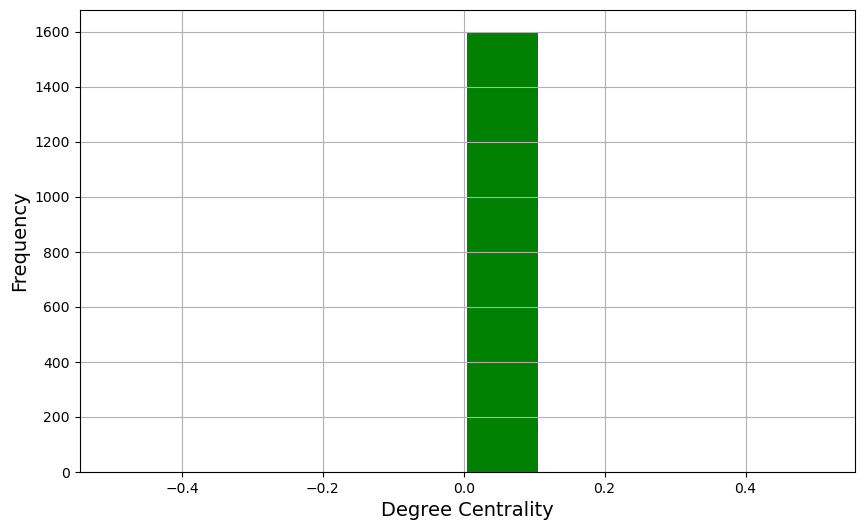

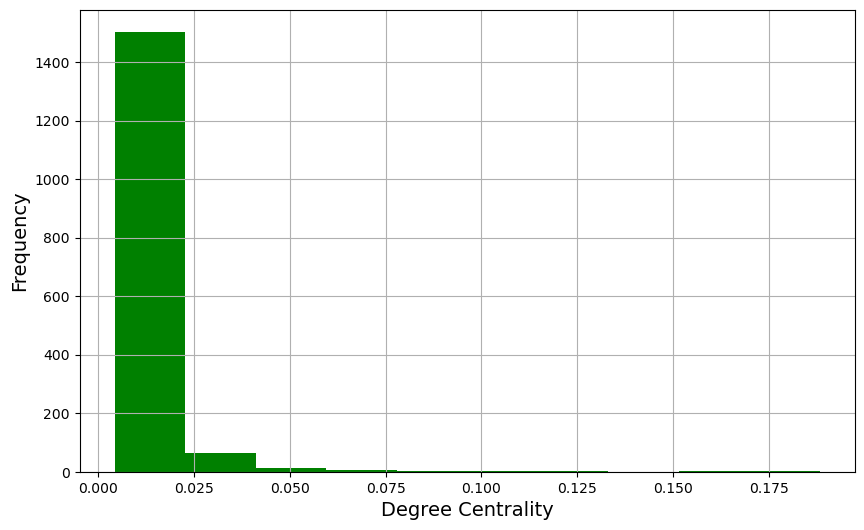

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

base_config = {
    'TP_percentage': 0.5,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'epsilon': 0.5,
    'comparison_attributes': ['budget', 'preference_sustainability', 'preference_conformity'],
    'seed': 42,  
    'num_influencers': 160    
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.3
    }
})

# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.3
    }
})

network_configs = {
    'Watts-Strogatz': watts_strogatz_config,
    'Barabasi-Albert': barabasi_albert_config,
    'Random Regular': random_regular_config,
    'Holme-Kim': holme_kim_config
}

def plot_degree_centrality_distribution(model, network_name):
    degree_centralities = nx.degree_centrality(model.G)
    
    centrality_values = list(degree_centralities.values())
    
    
    plt.figure(figsize=(10, 6))
    plt.hist(centrality_values, bins=10, color = 'green')
    #plt.title(f'Degree Centrality Distribution for {network_name} Network')
    plt.xlabel('Degree Centrality', fontsize = 14)
    plt.ylabel('Frequency', fontsize = 14)
    plt.grid(True)
    plt.show()



for network_name, config in network_configs.items():
    model = ConsumatModel(config)
    plot_degree_centrality_distribution(model, network_name)


### GSA

In [3]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from tqdm import tqdm
import json

base_config = {
    'TP_percentage': 0.5,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'epsilon': 0.5,
    'comparison_attributes': ['budget', 'preference_sustainability','preference_conformity'],
    'seed': 42, 
    'num_influencers': 50 
}

# Configuration for Watts-Strogatz network
watts_strogatz_config = base_config.copy()
watts_strogatz_config.update({
    'network_type': 'watts_strogatz',
    'network_params': {
        'n': 1600,
        'k': 8,
        'p': 0.1
    }
})

# Configuration for Barabasi-Albert network
barabasi_albert_config = base_config.copy()
barabasi_albert_config.update({
    'network_type': 'barabasi_albert',
    'network_params': {
        'n': 1600,
        'm': 8
    }
})

# Configuration for Random Regular network
random_regular_config = base_config.copy()
random_regular_config.update({
    'network_type': 'random_regular',
    'network_params': {
        'n': 1600,
        'd': 8
    }
})

# Configuration for Holme-Kim network
holme_kim_config = base_config.copy()
holme_kim_config.update({
    'network_type': 'holme_kim',
    'network_params': {
        'n': 1600,
        'm': 8,
        'p': 0.1
    }
})

network_configurations = {
    'Watts-Strogatz': watts_strogatz_config,
    'Barabasi-Albert': barabasi_albert_config,
   # 'Random Regular': random_regular_config,
    #'Holme-Kim': holme_kim_config
}

network_problems = {
    'Watts-Strogatz': {
        'num_vars': 9,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'k', 'p', 'num_influencers'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0, 1], [1, 10], [11, 20], [2, 10], [0, 1], [10, 300]]
    },
    'Barabasi-Albert': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'm', 'num_influencers'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0, 1], [1, 10], [11, 20], [2, 10], [10, 300]]
    },
    'Random Regular': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'd', 'num_influencers'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0, 1], [1, 10], [11, 20], [2, 10],  [10, 300]]
    },
    'Holme-Kim': {
        'num_vars': 9,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'm', 'p', 'num_influencers'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0, 1], [1, 10], [11, 20], [2, 10], [0, 1], [10, 300]]
    }
}

num_samples = 256

samples = {}
for network_name, problem in network_problems.items():
    samples[network_name] = saltelli.sample(problem, num_samples)

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': [],
        'Avg_F_Satisfaction': [],
        'Avg_S_Satisfaction': [],
        'Avg_P_Satisfaction': [],
        'Avg_F_Uncertainty': [],
        'Avg_S_Uncertainty': [],
        'Avg_P_Uncertainty': []
    }

    for step in range(num_steps):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())
        collected_data['Avg_F_Satisfaction'].append(np.mean([agent.F_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_S_Satisfaction'].append(np.mean([agent.S_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_P_Satisfaction'].append(np.mean([agent.P_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_F_Uncertainty'].append(np.mean([agent.F_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_S_Uncertainty'].append(np.mean([agent.S_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_P_Uncertainty'].append(np.mean([agent.P_uncertainty for agent in model.schedule.agents]))

    model_data = pd.DataFrame(collected_data)
    return model_data

def run_single_simulation(params, config, network_name, homophily_attribute, num_steps):
    config = config.copy()
    config['TP_percentage'] = params[0]
    config['satisfaction_threshold'] = params[1]
    config['uncertainty_threshold'] = params[2]
    config['homophily_attribute'] = homophily_attribute
    config['min_increase_percentage'] = params[4]
    config['max_increase_percentage'] = params[5]
    config['epsilon'] = params[3]
    config['num_influencers'] = int(params[-1])

    if network_name == 'Watts-Strogatz':
        config['network_params']['k'] = int(params[6])
        config['network_params']['p'] = params[7]
    elif network_name == 'Barabasi-Albert':
        config['network_params']['m'] = int(params[6])
    elif network_name == 'Random Regular':
        config['network_params']['d'] = int(params[6])
    elif network_name == 'Holme-Kim':
        config['network_params']['m'] = int(params[6])
        config['network_params']['p'] = params[7]

    model = ConsumatModel(config)
    model_data = collect_simulation_data(model, num_steps)
    final_step_data = model_data.iloc[-1]

    return [
        final_step_data['Adoption Rate'],
        final_step_data['Avg_F_Satisfaction'],
        final_step_data['Avg_S_Satisfaction'],
        final_step_data['Avg_P_Satisfaction'],
        final_step_data['Avg_F_Uncertainty'],
        final_step_data['Avg_S_Uncertainty'],
        final_step_data['Avg_P_Uncertainty']
    ]

def run_gsa_simulation_parallel(network_name, config, samples, homophily_attribute, num_steps, n_jobs=-1):
    all_results = Parallel(n_jobs=n_jobs)(
        delayed(run_single_simulation)(params, config, network_name, homophily_attribute, num_steps)
        for params in tqdm(samples, desc=f'Running simulations for {network_name} with {homophily_attribute}')
    )
    return np.array(all_results)

num_steps = 10
homophily_attributes = ['all']

for network_name, config in network_configurations.items():
    for homophily_attribute in homophily_attributes:
        print(f"Running GSA for {network_name} network with {homophily_attribute} attribute...")
        all_results = run_gsa_simulation_parallel(network_name, config, samples[network_name], homophily_attribute, num_steps)

        results = {}

        for i, output in enumerate(['Adoption Rate', 'Avg_F_Satisfaction', 'Avg_S_Satisfaction', 'Avg_P_Satisfaction', 'Avg_F_Uncertainty', 'Avg_S_Uncertainty', 'Avg_P_Uncertainty']):
            Si = sobol.analyze(network_problems[network_name], all_results[:, i], print_to_console=True, conf_level=0.95)
            results[output] = {
                'S1': Si['S1'].tolist(),
                'ST': Si['ST'].tolist(),
                'S2': Si['S2'].tolist(),
                'S1_conf': Si['S1_conf'].tolist(),
                'ST_conf': Si['ST_conf'].tolist()
            }
            print(f'Sensitivity analysis for {output} ({network_name} network, {homophily_attribute} attribute):')
            print(Si)

        with open(f'newinfluencer_sensitivity_results_{network_name}_{homophily_attribute}.json', 'w') as f:
            json.dump(results, f)


/var/folders/zk/_bvnn9sn4jz8m5lz73ljcjrr0000gn/T/ipykernel_43376/1730113073.py:100: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  samples[network_name] = saltelli.sample(problem, num_samples)


Running GSA for Watts-Strogatz network with all attribute...


Running simulations for Watts-Strogatz with all:   4%|▍         | 192/5120 [09:29<4:39:39,  3.41s/it]

In [78]:
dynamic_file_paths = {
    "Barabasi-Albert": "/Users/alexelphinstone/Downloads/ThesisNew-1/influencer_sensitivity_results_Barabasi-Albert_budget.json",
    "Holme-Kim": "/Users/alexelphinstone/Downloads/ThesisNew-1/influencer_sensitivity_results_Holme-Kim_budget.json",
    }

network_problems = {
    'Watts-Strogatz': {
        'num_vars': 11,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'k', 'p', 'alpha', 'beta', 'num_influencers'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0, 1], [1, 10], [11, 20], [2, 10], [0, 1], [0, 10], [0, 1], [10, 200]]
    },
    'Barabasi-Albert': {
        'num_vars': 10,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'm', 'alpha', 'beta', 'num_influencers'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0, 1], [1, 10], [11, 20], [2, 10], [0, 10], [0, 1], [10, 200]]
    },
    'Random Regular': {
        'num_vars': 10,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'd', 'alpha', 'beta', 'num_influencers'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0, 1], [1, 10], [11, 20], [2, 10], [0, 10], [0, 1], [10, 200]]
    },
    'Holme-Kim': {
        'num_vars': 11,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'm', 'p', 'alpha', 'beta', 'num_influencers'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0, 1], [1, 10], [11, 20], [2, 10], [0, 1], [0, 10], [0, 1], [10, 200]]
    }
}

parameter_names = {
    "num_influencers":"Number of Influencers",
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage",
    "epsilon": "Epsilon",
    "alpha": "alpha",
    "beta": "beta",
    "k": "k",
    "p": "p",
    "m": "m",
    "d": "d"
}

measure_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}

network_data_frames = {}
for network, file_path in dynamic_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            df['Network'] = network
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  
        combined_df['Measure'] = combined_df['Measure'].map(measure_names) 
        combined_df = combined_df.drop(columns=['S2'])
        network_data_frames[network] = combined_df

In [80]:
combined_network_df = pd.concat(network_data_frames.values(), ignore_index=True)


pivot_df = combined_network_df.pivot_table(index=['Measure', 'Parameter'], columns='Network', values='ST')

pivot_df.columns = [f'ST - {col}' for col in pivot_df.columns]

pivot_df.reset_index(inplace=True)

pivot_df.to_excel('influencer_experiment_pivot_ST.xlsx', index=False)


pivot_df = combined_network_df.pivot_table(index=['Measure', 'Parameter'], columns='Network', values='S1')

pivot_df.columns = [f'S1 - {col}' for col in pivot_df.columns]

pivot_df.reset_index(inplace=True)

pivot_df.to_excel('influencer_experiment_pivot_S1.xlsx', index=False)

/var/folders/zk/_bvnn9sn4jz8m5lz73ljcjrr0000gn/T/ipykernel_5101/66448745.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_str = data.applymap(lambda x: value_format.format(x) if not np.isnan(x) else '')


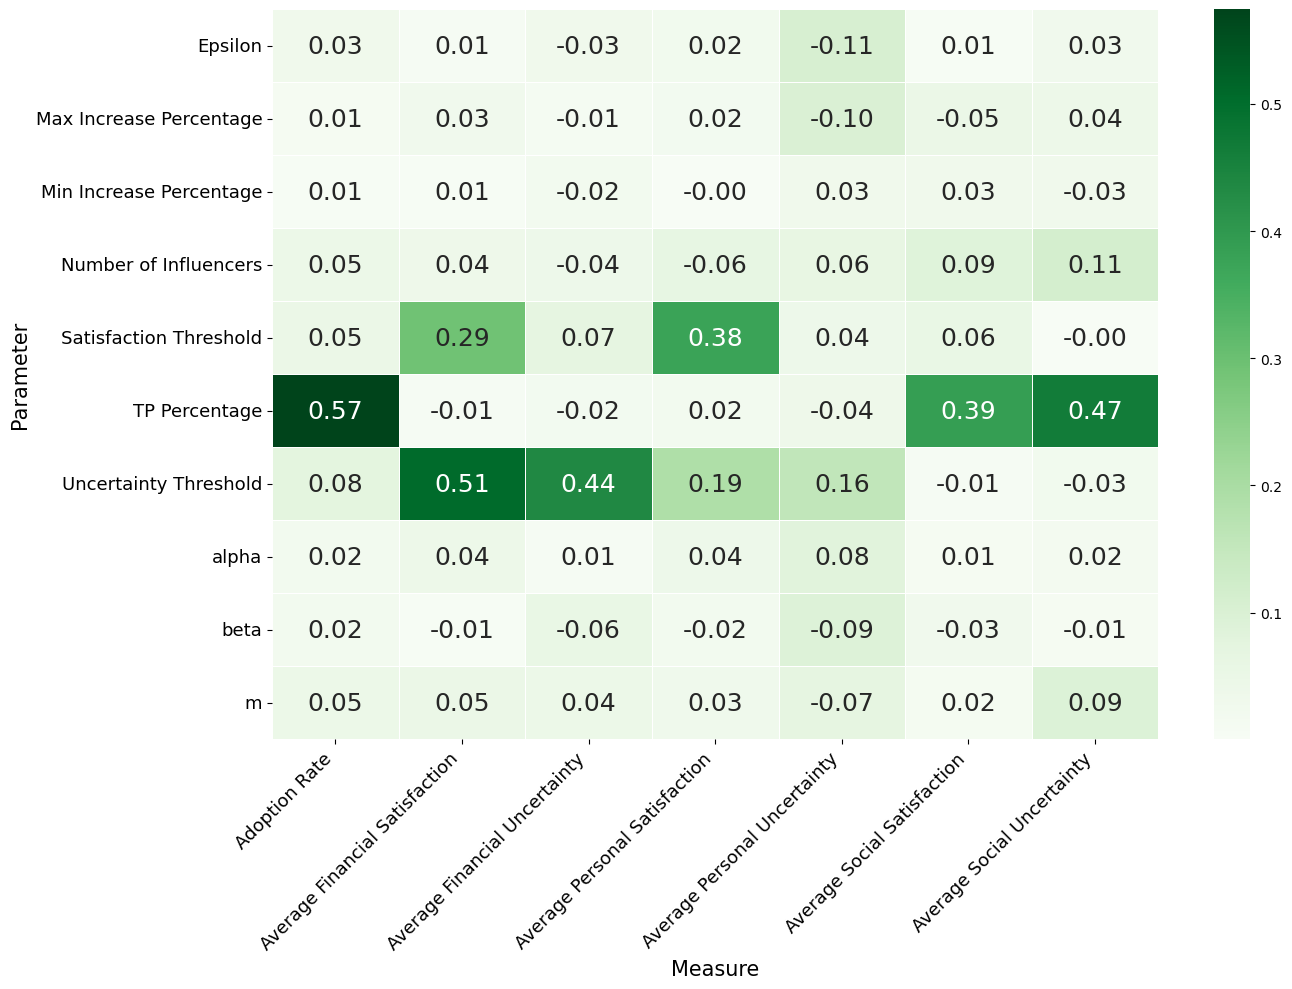

/var/folders/zk/_bvnn9sn4jz8m5lz73ljcjrr0000gn/T/ipykernel_5101/66448745.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_str = data.applymap(lambda x: value_format.format(x) if not np.isnan(x) else '')


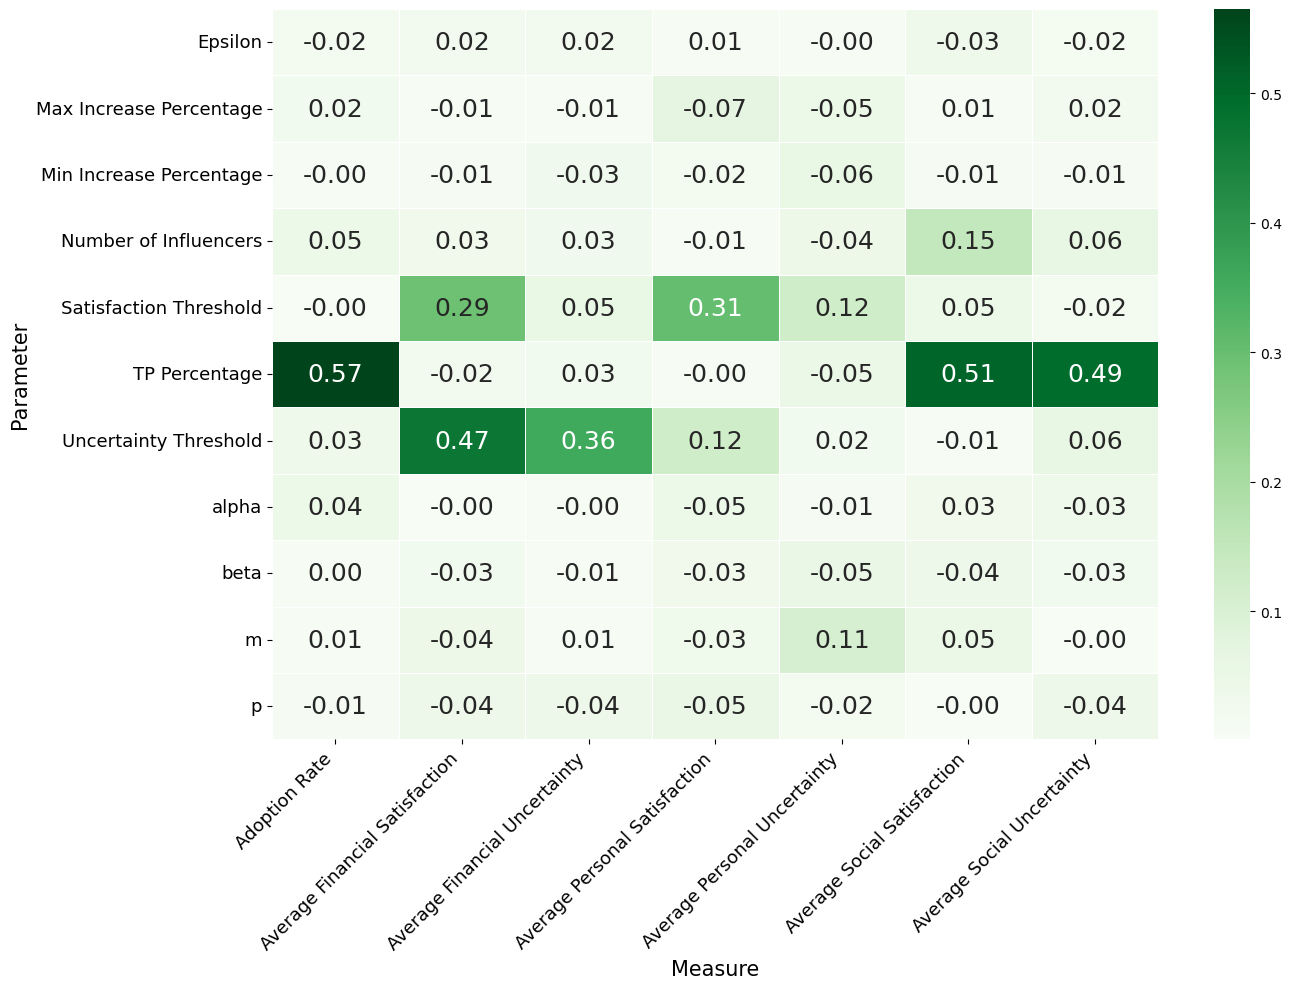

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = '/Users/alexelphinstone/Downloads/ThesisNew-1/Experiments/influencer_experiment_pivot_S1.xlsx'
data = pd.read_excel(file_path)

for column in data.columns[2:]:
    data[column] = data[column].astype(str).str.replace(',', '.')

for column in data.columns[2:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

data_melted = pd.melt(data, id_vars=['Measure', 'Parameter'], value_vars=data.columns[2:], var_name='Network_Type', value_name='Value')

data_melted_clean = data_melted.pivot_table(index=['Parameter', 'Measure'], columns='Network_Type', values='Value').reset_index()

def annot_heatmap(data, value_format="{:.2f}"):
    data_str = data.applymap(lambda x: value_format.format(x) if not np.isnan(x) else '')
    return data_str

def create_heatmaps(data, network_type):
    pivot_table = data.pivot_table(index="Parameter", columns="Measure", values=network_type)
    pivot_table = pivot_table.dropna(how='any', axis=0)  
    plt.figure(figsize=(14, 10))
    abs_values = pivot_table.abs()  
    sns.heatmap(abs_values, annot=annot_heatmap(pivot_table), fmt="", cmap="Greens", linewidths=.5, annot_kws={"size": 18})
    plt.xlabel('Measure', fontsize=15)
    plt.ylabel('Parameter', fontsize=15)
    plt.xticks(rotation=45, ha='right', fontsize=13)
    plt.yticks(rotation=0, fontsize=13)
    plt.tight_layout()
    plt.savefig(f'/Users/alexelphinstone/Downloads/ThesisNew-1/Experiments/influencer_S1_{network_type}.png')
    plt.show()

network_types = data_melted_clean.columns[2:]

for network in network_types:
    create_heatmaps(data_melted_clean, network)


/var/folders/zk/_bvnn9sn4jz8m5lz73ljcjrr0000gn/T/ipykernel_5101/254635925.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_str = data.applymap(lambda x: value_format.format(x) if not np.isnan(x) else '')


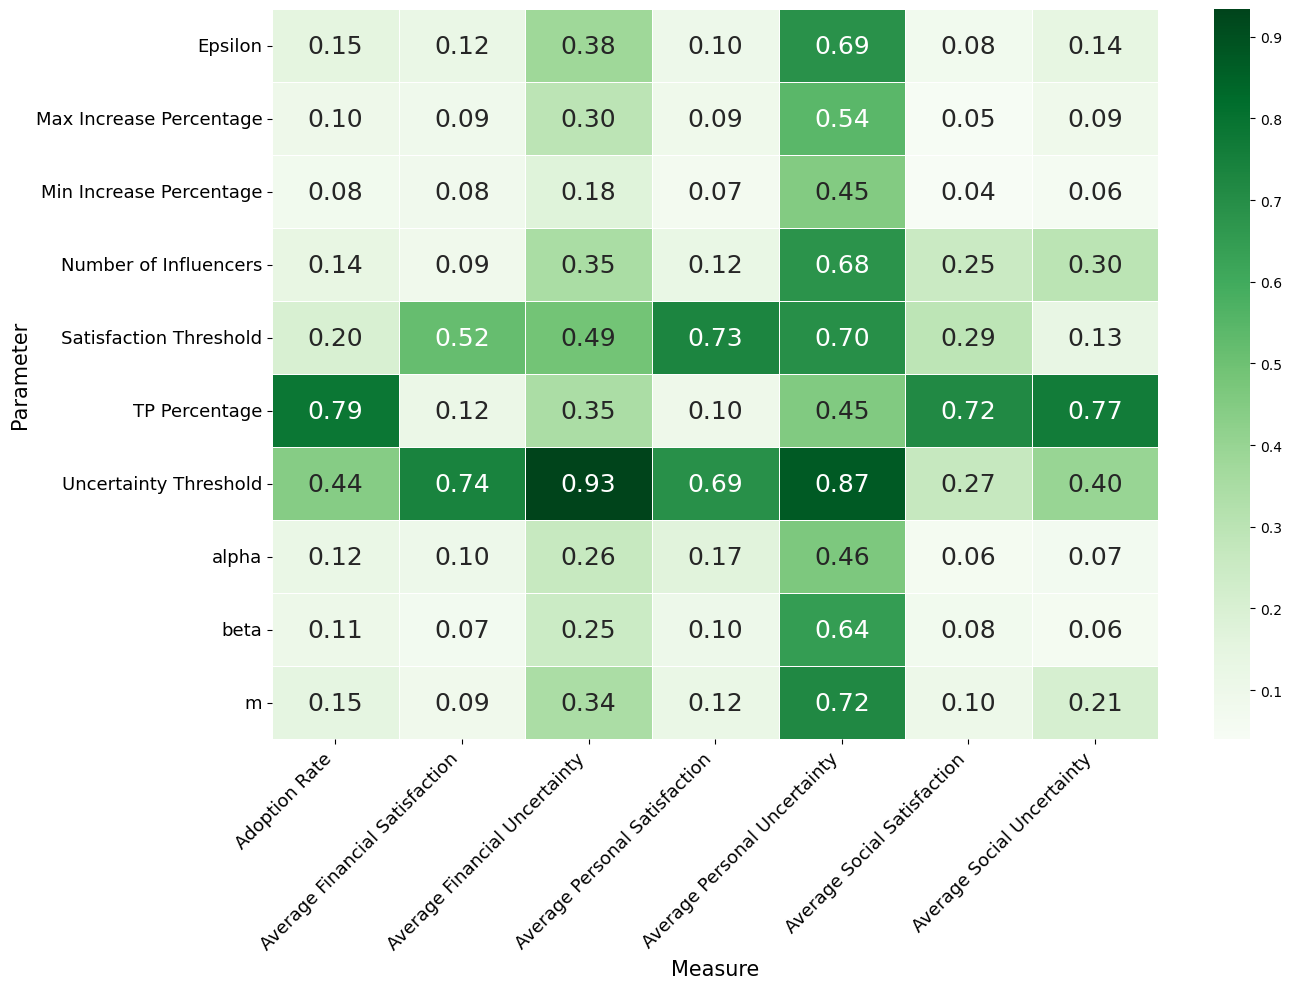

/var/folders/zk/_bvnn9sn4jz8m5lz73ljcjrr0000gn/T/ipykernel_5101/254635925.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_str = data.applymap(lambda x: value_format.format(x) if not np.isnan(x) else '')


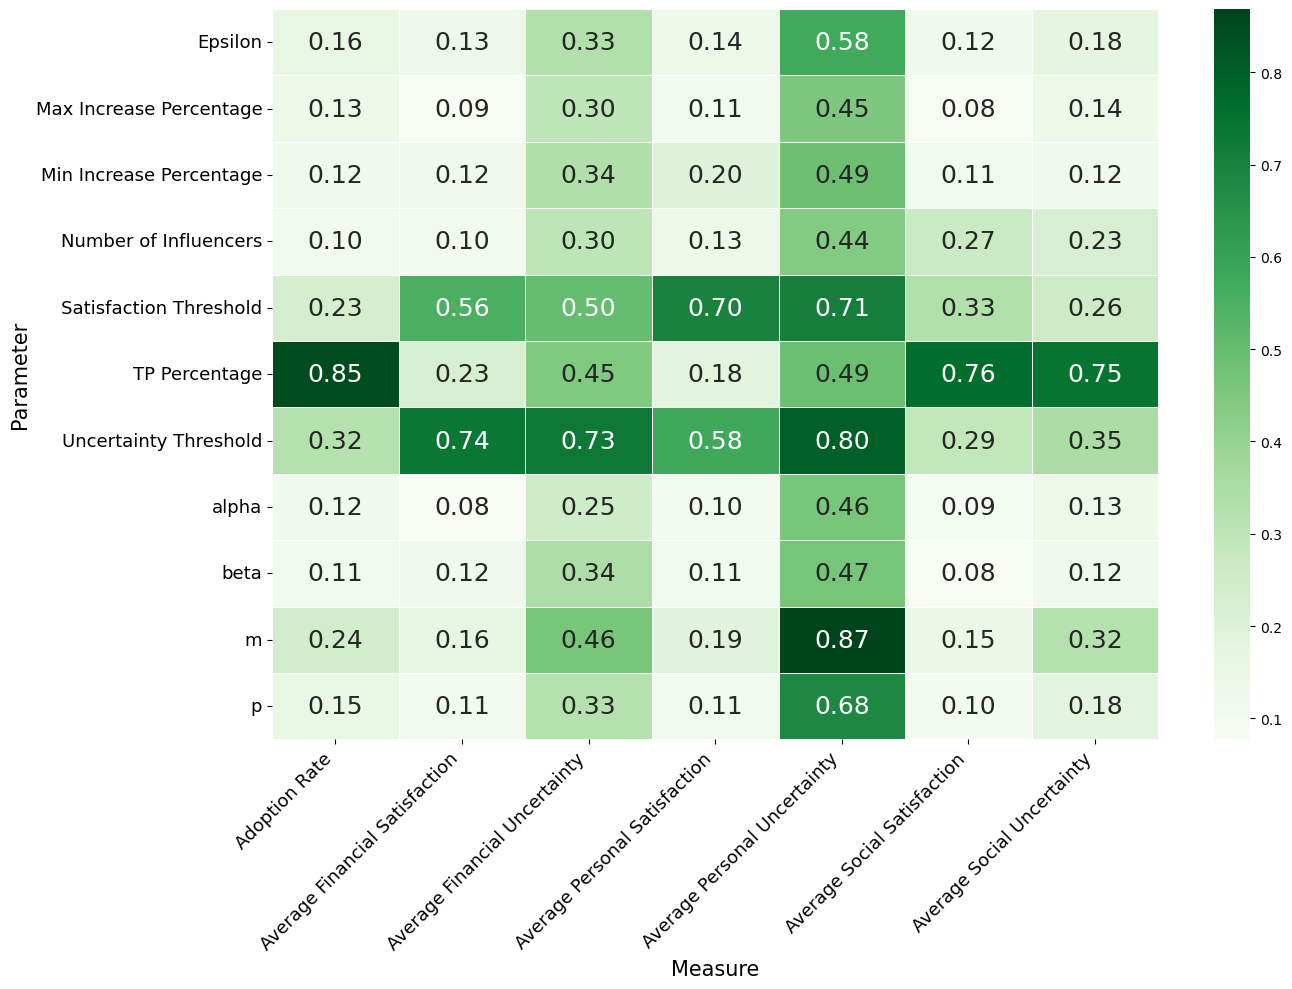

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = '/Users/alexelphinstone/Downloads/ThesisNew-1/Experiments/influencer_experiment_pivot_ST.xlsx'
data = pd.read_excel(file_path)

for column in data.columns[2:]:
    data[column] = data[column].astype(str).str.replace(',', '.')

for column in data.columns[2:]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

data_melted = pd.melt(data, id_vars=['Measure', 'Parameter'], value_vars=data.columns[2:], var_name='Network_Type', value_name='Value')

data_melted_clean = data_melted.pivot_table(index=['Parameter', 'Measure'], columns='Network_Type', values='Value').reset_index()

def annot_heatmap(data, value_format="{:.2f}"):
    data_str = data.applymap(lambda x: value_format.format(x) if not np.isnan(x) else '')
    return data_str

def create_heatmaps(data, network_type):
    pivot_table = data.pivot_table(index="Parameter", columns="Measure", values=network_type)
    pivot_table = pivot_table.dropna(how='any', axis=0) 
    plt.figure(figsize=(14, 10))
    abs_values = pivot_table.abs()  
    sns.heatmap(abs_values, annot=annot_heatmap(pivot_table), fmt="", cmap="Greens", linewidths=.5, annot_kws={"size": 18})
    plt.xlabel('Measure', fontsize=15)
    plt.ylabel('Parameter', fontsize=15)
    plt.xticks(rotation=45, ha='right', fontsize=13)
    plt.yticks(rotation=0, fontsize=13)
    plt.tight_layout()
    plt.savefig(f'/Users/alexelphinstone/Downloads/ThesisNew-1/Experiments/influencer_ST_{network_type}.png')
    plt.show()

network_types = data_melted_clean.columns[2:]

for network in network_types:
    create_heatmaps(data_melted_clean, network)


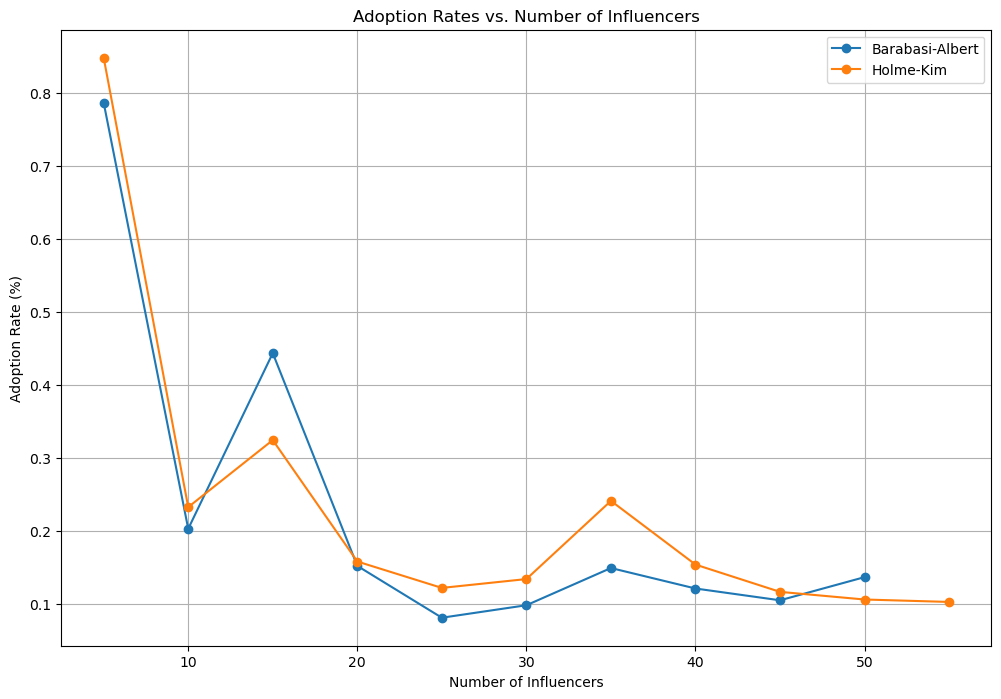

In [84]:
import json
import numpy as np
import matplotlib.pyplot as plt

files = {
    "Barabasi-Albert": '/Users/alexelphinstone/Downloads/ThesisNew-1/Experiments/influencer_sensitivity_results_Barabasi-Albert_budget.json',
    "Holme-Kim": '/Users/alexelphinstone/Downloads/ThesisNew-1/Experiments/influencer_sensitivity_results_Holme-Kim_budget.json'
}

adoption_rates = {}

for network, filepath in files.items():
    with open(filepath, 'r') as file:
        data = json.load(file)
        adoption_rate_data = data['Adoption Rate']['ST']
        adoption_rates[network] = adoption_rate_data

num_influencers_values = np.arange(5, 105, 5)

plt.figure(figsize=(12, 8))

for network, rates in adoption_rates.items():
    plt.plot(num_influencers_values[:len(rates)], rates, marker='o', label=network)

plt.title('Adoption Rates vs. Number of Influencers')
plt.xlabel('Number of Influencers')
plt.ylabel('Adoption Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


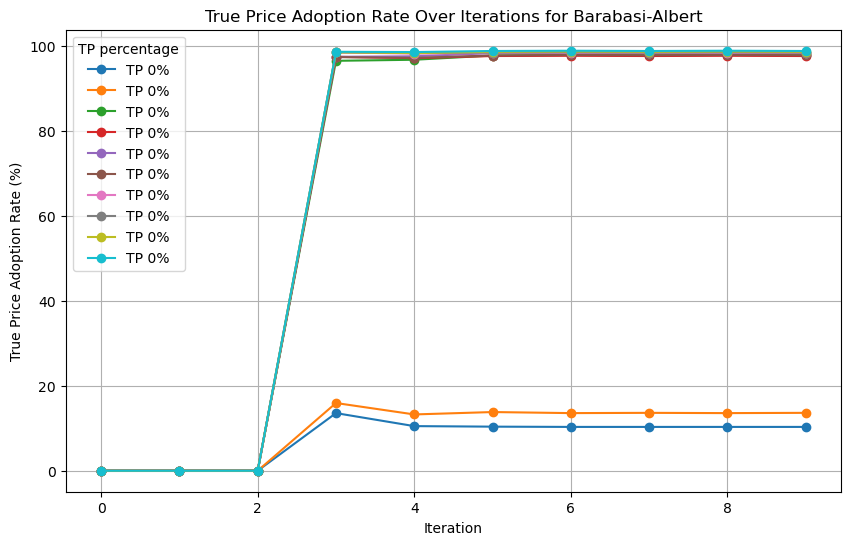

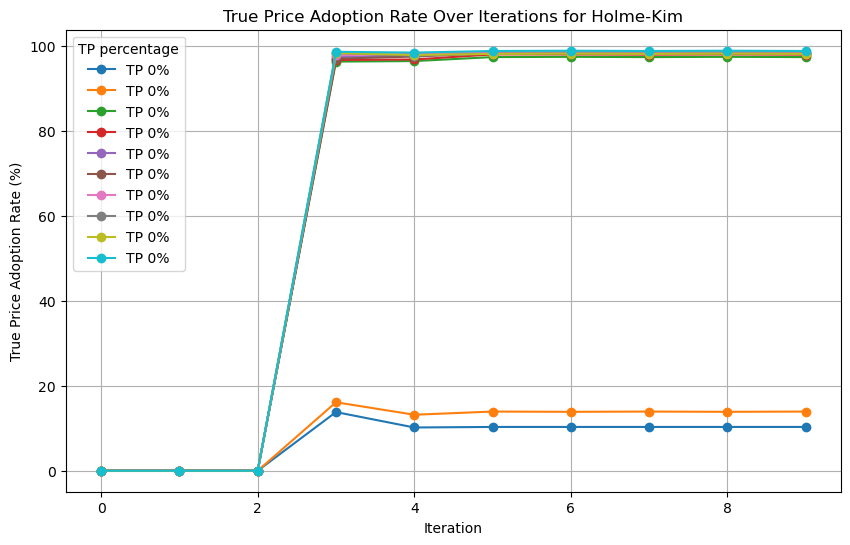

In [85]:

for network_name, config in network_configurations.items():
    plt.figure(figsize=(10, 6))
    
    for config_name, sim_data_list in all_simulation_data.items():
        if network_name in config_name:
            tp_percentage = float(config_name.split('_TP_')[-1].replace('%', '')) / 100
            tp_percentage_label = int(tp_percentage * 100)
            sim_data = sim_data_list[0] 
            plt.plot(sim_data['Adoption Rates'], marker='o', label=f'TP {tp_percentage_label}%')
    
    plt.title(f'True Price Adoption Rate Over Iterations for {network_name}')
    plt.xlabel('Iteration')
    plt.ylabel('True Price Adoption Rate (%)')
    plt.grid(True)
    plt.legend(title='TP percentage')
    plt.show()


In [ ]:
network_configurations = {
    
    'Barabasi-Albert': barabasi_albert_config,
    'Holme-Kim': holme_kim_config
}

varying_params = {
    'num_influencers': list(range(0, 400, 10)), 
}

num_simulations = 1
num_steps = 10

all_configurations = {}
for network_name, net_config in network_configurations.items():
    net_configs = generate_configurations({**base_config, **net_config}, varying_params)
    for idx, config in enumerate(net_configs):
        config_name = f"{network_name}_Config_{idx+1}_Influencers_{config['num_influencers']}"
        all_configurations[config_name] = config

results, all_simulation_data = run_all_simulations(all_configurations, num_steps, num_simulations)

plot_adoption_rates(all_simulation_data, varying_params)


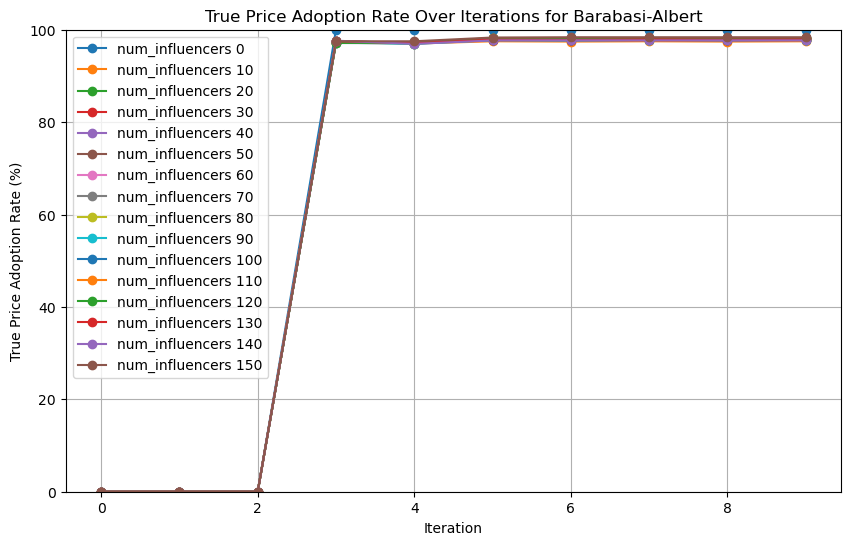

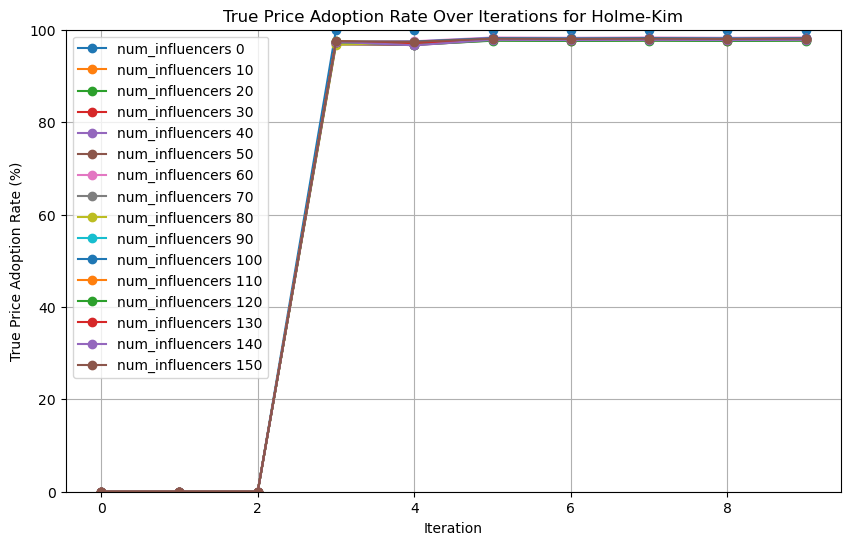

In [93]:
import matplotlib.pyplot as plt

def plot_adoption_rates(all_simulation_data, varying_params):
    param_name = list(varying_params.keys())[0]

    network_groups = {}
    for config_name in all_simulation_data.keys():
        network_name = config_name.split('_Config_')[0]
        if network_name not in network_groups:
            network_groups[network_name] = []
        network_groups[network_name].append(config_name)
    
    for network_name, config_names in network_groups.items():
        plt.figure(figsize=(10, 6))
        
        for config_name in config_names:
            data = all_simulation_data[config_name]
            num_influencers = config_name.split('_Influencers_')[1]
            for idx, sim_data in enumerate(data):
                plt.plot(sim_data['Adoption Rates'], marker='o', label=f'{param_name} {num_influencers}')
        
        plt.title(f'True Price Adoption Rate Over Iterations for {network_name}')
        plt.xlabel('Iteration')
        plt.ylabel('True Price Adoption Rate (%)')
        plt.ylim(0, 100)
        plt.grid(True)
        plt.legend()
        plt.savefig(f"/Users/alexelphinstone/Downloads/ThesisNew-1/Experiments/influencer_figures/{network_name}_varying_influencers.png")
        plt.show()

varying_params = {
    'num_influencers': list(range(0, 160, 10)), 
}

plot_adoption_rates(all_simulation_data, varying_params)
